In [1]:
%matplotlib inline

In [81]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [76]:
#importing libraries for future analysis of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.stats as st
import requests
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [4]:
#using curated csv file for airbnb open data for New York city from Kaggle
airbnbNY =pd.read_csv("AB_NYC_2019.csv")
airbnbNY.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [79]:
#calculating a minimum payment since price is per night and listings have a minimum night requirement
airbnbNY['min_price_to_stay'] = airbnbNY['price'] * airbnbNY['minimum_nights']

# reading columns in a new dataframe which we believe to be useful for analysis
# don`t feel the need to drop the columns as we have only 16 columns in this dataset.
airbnbNY = airbnbNY[['host_id', 'id', 'neighbourhood_group','neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'min_price_to_stay',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']]

airbnbNY.head()


,host_id,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,min_price_to_stay,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,149,9,0.21,6,365
1,2845,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,225,45,0.38,2,355
2,4632,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,450,0,NaN,1,365
3,4869,3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,89,270,4.64,1,194
4,7192,5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,800,9,0.10,1,0


In [6]:
#unique values of neighbourhood_group
airbnbNY.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [7]:
airbnbNY_StatenIsland = airbnbNY.loc[airbnbNY['neighbourhood_group'] == 'Staten Island']
airbnbNY_StatenIsland.head()

,host_id,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,min_price_to_stay,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
169,185978,42882,Staten Island,St. George,40.64524,-74.08088,Private room,70,2,140,166,1.66,1,312
249,303939,62452,Staten Island,Tompkinsville,40.63536,-74.08537,Private room,36,2,72,193,1.85,6,360
250,303939,62461,Staten Island,Tompkinsville,40.63627,-74.08543,Private room,37,2,74,147,1.44,6,0
251,303939,62787,Staten Island,Tompkinsville,40.63518,-74.08546,Private room,37,2,74,177,1.71,6,320
256,303939,63320,Staten Island,Tompkinsville,40.63481,-74.08519,Private room,36,2,72,333,3.19,6,340


In [8]:
#len(airbnbNY)
len(airbnbNY_StatenIsland)

373

In [9]:
#checking data type for columns
airbnbNY_StatenIsland.dtypes

host_id                             int64
id                                  int64
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
min_price_to_stay                   int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [80]:
#checking duplicates
airbnbNY_StatenIsland.duplicated().sum()

0

In [10]:
#checking null values
#airbnbNY_StatenIsland.count()
airbnbNY_StatenIsland.isnull().sum()

host_id                            0
id                                 0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
min_price_to_stay                  0
number_of_reviews                  0
reviews_per_month                 59
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [11]:
#replacing null values in reviews_per_month to 0

airbnbNY_StatenIsland.loc[:, 'reviews_per_month'] = airbnbNY_StatenIsland.loc[:, 'reviews_per_month'].fillna(0)
airbnbNY_StatenIsland.head()

,host_id,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,min_price_to_stay,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
169,185978,42882,Staten Island,St. George,40.64524,-74.08088,Private room,70,2,140,166,1.66,1,312
249,303939,62452,Staten Island,Tompkinsville,40.63536,-74.08537,Private room,36,2,72,193,1.85,6,360
250,303939,62461,Staten Island,Tompkinsville,40.63627,-74.08543,Private room,37,2,74,147,1.44,6,0
251,303939,62787,Staten Island,Tompkinsville,40.63518,-74.08546,Private room,37,2,74,177,1.71,6,320
256,303939,63320,Staten Island,Tompkinsville,40.63481,-74.08519,Private room,36,2,72,333,3.19,6,340


In [12]:
#finding outliers
min_nights_StatenIsland_quartiles = airbnbNY_StatenIsland['minimum_nights'].quantile([.25,.5,.75])
min_nights_lowerq = min_nights_StatenIsland_quartiles[.25]
min_nights_upperq = min_nights_StatenIsland_quartiles[.75]
min_nights_iqr = (min_nights_upperq-min_nights_lowerq).round(2)
min_nights_low_b = (min_nights_lowerq - (1.5*min_nights_iqr)).round(2)
print(f'lower bound for minimum nights is {min_nights_low_b}')
min_nights_up_b = (min_nights_upperq + (1.5*min_nights_iqr)).round(2)
print(f'upper bound for minimum nights is {min_nights_up_b}')

price_StatenIsland_quartiles = airbnbNY_StatenIsland['price'].quantile([.25,.5,.75])
price_lowerq = price_StatenIsland_quartiles[.25]
price_upperq = price_StatenIsland_quartiles[.75]
price_iqr = (price_upperq-price_lowerq).round(2)
price_low_b = (price_lowerq - (1.5*price_iqr)).round(2)
print(f'lower bound for price is {price_low_b}')
price_up_b = (price_upperq + (1.5*price_iqr)).round(2)
print(f'upper bound for price is {price_up_b}')

lower bound for minimum nights is -2.0
upper bound for minimum nights is 6.0
lower bound for price is -40.0
upper bound for price is 200.0


In [13]:
#removing outlier and creating a clean DF

airbnbNY_StatenIsland_df = airbnbNY_StatenIsland.loc[(airbnbNY_StatenIsland['price'] <= 200) 
                                                   & (airbnbNY_StatenIsland['minimum_nights'] <= 6) 
                                                   & (airbnbNY_StatenIsland['number_of_reviews'] > 0)]
airbnbNY_StatenIsland_df.head()

,host_id,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,min_price_to_stay,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
169,185978,42882,Staten Island,St. George,40.64524,-74.08088,Private room,70,2,140,166,1.66,1,312
249,303939,62452,Staten Island,Tompkinsville,40.63536,-74.08537,Private room,36,2,72,193,1.85,6,360
250,303939,62461,Staten Island,Tompkinsville,40.63627,-74.08543,Private room,37,2,74,147,1.44,6,0
251,303939,62787,Staten Island,Tompkinsville,40.63518,-74.08546,Private room,37,2,74,177,1.71,6,320
256,303939,63320,Staten Island,Tompkinsville,40.63481,-74.08519,Private room,36,2,72,333,3.19,6,340


In [14]:
# Staten island listings original: 373 after removing outliers: 282
len(airbnbNY_StatenIsland_df)

282

In [15]:
# establish bins for price so we can categorize the neighbourhood and room type
price_bins = [0,49.9,99.9,149.9,249.9,10001]
price_bin_names = ['0-49','50-99','100-149','150-249','>250']
StatenIsland_room_info = airbnbNY_StatenIsland_df.loc[:,['neighbourhood','room_type','number_of_reviews','minimum_nights','price','min_price_to_stay']]
StatenIsland_room_info['price range'] = pd.cut(StatenIsland_room_info['price'],price_bins,labels=price_bin_names)

StatenIsland_neighbourhoods = StatenIsland_room_info.groupby(['neighbourhood', 'room_type', 'price range']).agg(['count', 'mean', 'min', 'max'])
StatenIsland_neighbourhoods = StatenIsland_neighbourhoods.sort_values(by=('number_of_reviews', 'count'), ascending=False)
StatenIsland_neighbourhoods.sort_values(by=('number_of_reviews', 'count'), ascending=False).head(20)

number_of_reviews                    \
                                                      count        mean   min   
neighbourhood room_type       price range                                       
Concord       Private room    0-49                       15   29.866667   2.0   
Tompkinsville Private room    0-49                       12  115.000000  12.0   
                              50-99                      11   18.272727   3.0   
Stapleton     Private room    50-99                      11   30.727273   2.0   
St. George    Entire home/apt 50-99                       8   58.500000   1.0   
              Private room    50-99                       8   76.000000   4.0   
Arrochar      Private room    0-49                        7   16.714286   6.0   
St. George    Entire home/apt 100-149                     7   67.428571   1.0   
West Brighton Private room    50-99                       6   32.666667   5.0   
Tompkinsville Entire home/apt 50-99                       6   65.666667  13.0   
Clifton       Entire home/apt 50-99                       5   89.600000   1.0   
Randall Manor Entire home/apt 100-149                     4   14.250000   3.0   
Stapleton     Private room    0-49                        4   44.250000  11.0   
Randall Manor Entire home/apt 50-99                       4   44.250000   1.0   
Tompkinsville Entire home/apt 100-149                     4   56.500000  10.0   
St. George    Private room    100-149                     4   24.750000   1.0   
Randall Manor Private room    50-99                       4   13.000000   4.0   
West Brighton Private room    0-49                        4   37.250000  25.0   
St. George    Entire home/apt 150-249                     4   52.250000  22.0   
South Beach   Private room    50-99                       4   13.500000   2.0   

                                                 minimum_nights            \
                                             max          count      mean   
neighbourhood room_type       price range                                   
Concord       Private room    0-49          73.0             15  3.400000   
Tompkinsville Private room    0-49         333.0             12  2.083333   
                              50-99         48.0             11  2.181818   
Stapleton     Private room    50-99        137.0             11  1.181818   
St. George    Entire home/apt 50-99        129.0              8  3.750000   
              Private room    50-99        234.0              8  2.000000   
Arrochar      Private room    0-49          39.0              7  4.000000   
St. George    Entire home/apt 100-149      116.0              7  2.000000   
West Brighton Private room    50-99         64.0              6  1.833333   
Tompkinsville Entire home/apt 50-99        117.0              6  2.833333   
Clifton       Entire home/apt 50-99        242.0              5  2.000000   
Randall Manor Entire home/apt 100-149       21.0              4  2.250000   
Stapleton     Private room    0-49         112.0              4  1.250000   
Randall Manor Entire home/apt 50-99        131.0              4  1.750000   
Tompkinsville Entire home/apt 100-149      132.0              4  2.750000   
St. George    Private room    100-149       77.0              4  1.500000   
Randall Manor Private room    50-99         23.0              4  2.250000   
West Brighton Private room    0-49          47.0              4  2.000000   
St. George    Entire home/apt 150-249      105.0              4  2.250000   
South Beach   Private room    50-99         38.0              4  1.250000   

                                                    price                     \
                                           min  max count        mean    min   
neighbourhood room_type       price range                                      
Concord       Private room    0-49         1.0  4.0    15   33.333333   30.0   
Tompkinsville Private room    0-49         1.0  3.0    12   38.916667   30.0   
      

In [16]:
# order the neighborhoods by number of listings
StatenIsland_neighbourhood_by_popularity = []

for row in StatenIsland_neighbourhoods.head(25).index:
    if row[0] not in StatenIsland_neighbourhood_by_popularity:
        StatenIsland_neighbourhood_by_popularity.append(row[0])

StatenIsland_neighbourhood_listing_count = []


for n in StatenIsland_neighbourhood_by_popularity:
    count = len(airbnbNY_StatenIsland.loc[airbnbNY_StatenIsland['neighbourhood'] == n])
    StatenIsland_neighbourhood_listing_count.append(count)

listing_count_by_neighbourhood_df = pd.DataFrame({
    'neighbourhood': StatenIsland_neighbourhood_by_popularity,
    'count': StatenIsland_neighbourhood_listing_count
})

listing_count_by_neighbourhood_df = listing_count_by_neighbourhood_df.sort_values(by='count', ascending=False)
listing_count_by_neighbourhood_df

,neighbourhood,count
3,St. George,48
1,Tompkinsville,42
2,Stapleton,27
0,Concord,26
4,Arrochar,21
8,Randall Manor,19
5,West Brighton,18
6,Clifton,15
9,Port Richmond,9
7,South Beach,8


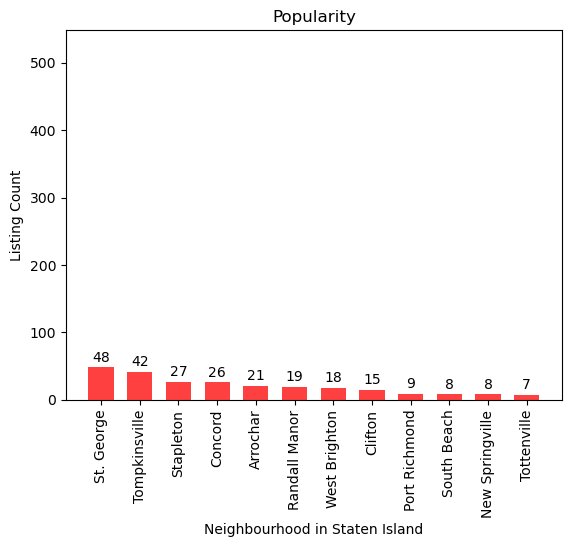

In [83]:
fig, ax = plt.subplots()

x_axis = np.arange(len(StatenIsland_neighbourhood_by_popularity))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, listing_count_by_neighbourhood_df['neighbourhood'], rotation=90)

y_axis = listing_count_by_neighbourhood_df['count']


rects1 = ax.bar(x_axis, y_axis, color="red", alpha=0.75, align="center",  width=0.65)


ax.set_ylabel('Listing Count')
ax.set_title('Popularity')
ax.set_xlabel('Neighbourhood in Staten Island')
ax.set_ylim(0,max(StatenIsland_neighbourhood_listing_count)+500)


def autolabel(rects):
    # Attach a text label above each bar in *rects*, displaying its height.
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)

plt.show()

In [18]:
# take the top 25 neighbourhoods
neighbourhood_by_price = StatenIsland_neighbourhoods.head(25)

neighbourhood_by_price = neighbourhood_by_price.reset_index()

worth_per_stay = []

for i in range(len(neighbourhood_by_price)):
    if neighbourhood_by_price['room_type'][i] == 'Private room':
        # if it the listing is a private room, we will assume that there are two rooms available to list
        worth_per_stay.append(neighbourhood_by_price.loc[:, ('min_price_to_stay', 'mean')][i]*2)
    else:
        worth_per_stay.append(neighbourhood_by_price.loc[:, ('min_price_to_stay', 'mean')][i])
    
neighbourhood_by_price['worth_per_stay'] = worth_per_stay
neighbourhood_by_price

neighbourhood        room_type price range number_of_reviews  \
                                                             count   
0           Concord     Private room        0-49                15   
1     Tompkinsville     Private room        0-49                12   
2     Tompkinsville     Private room       50-99                11   
3         Stapleton     Private room       50-99                11   
4        St. George  Entire home/apt       50-99                 8   
5        St. George     Private room       50-99                 8   
6          Arrochar     Private room        0-49                 7   
7        St. George  Entire home/apt     100-149                 7   
8     West Brighton     Private room       50-99                 6   
9     Tompkinsville  Entire home/apt       50-99                 6   
10          Clifton  Entire home/apt       50-99                 5   
11      South Beach     Private room       50-99                 4   
12       St. George  Entire home/apt     150-249                 4   
13       St. George     Private room     100-149                 4   
14    West Brighton     Private room        0-49                 4   
15    Randall Manor     Private room       50-99                 4   
16    Randall Manor  Entire home/apt     100-149                 4   
17    Tompkinsville  Entire home/apt     100-149                 4   
18    Randall Manor  Entire home/apt       50-99                 4   
19        Stapleton     Private room        0-49                 4   
20         Arrochar  Entire home/apt     150-249                 3   
21    Port Richmond     Private room       50-99                 3   
22    Port Richmond     Private room        0-49                 3   
23      Tottenville  Entire home/apt       50-99                 3   
24  New Springville     Private room       50-99                 3   

                            minimum_nights                     price  \
          mean   min    max          count      mean  min  max count   
0    29.866667   2.0   73.0             15  3.400000  1.0  4.0    15   
1   115.000000  12.0  333.0             12  2.083333  1.0  3.0    12   
2    18.272727   3.0   48.0             11  2.181818  1.0  3.0    11   
3    30.727273   2.0  137.0             11  1.181818  1.0  2.0    11   
4    58.500000   1.0  129.0              8  3.750000  2.0  5.0     8   
5    76.000000   4.0  234.0              8  2.000000  1.0  3.0     8   
6    16.714286   6.0   39.0              7  4.000000  4.0  4.0     7   
7    67.428571   1.0  116.0              7  2.000000  1.0  3.0     7   
8    32.666667   5.0   64.0              6  1.833333  1.0  2.0     6   
9    65.666667  13.0  117.0              6  2.833333  1.0  4.0     6   
10   89.600000   1.0  242.0              5  2.000000  1.0  5.0     5   
11   13.500000   2.0   38.0              4  1.250000  1.0  2.0     4   
12   52.250000  22.0  105.0              4  2.250000  1.0  3.0     4   
13   24.750000   1.0   77.0              4  1.500000  1.0  2.0     4   
14   37.250000  25.0   47.0              4  2.000000  2.0  2.0     4   
15   13.000000   4.0   23.0              4  2.250000  2.0  3.0     4   
16   14.250000   3.0   21.0              4  2.250000  2.0  3.0     4   
17   56.500000  10.0  132.0              4  2.750000  2.0  3.0     4   
18   44.250000   1.0  131.0              4  1.750000  1.0  2.0     4   
19   44.250000  11.0  112.0              4  1.250000  1.0  2.0     4   
20    4.666667   1.0   12.0              3  2.000000  1.0  3.0     3   
21   19.666667   3.0   40.0              3  1.000000  1.0  1.0     3   
22   31.000000  13.0   63.0              3  1.333333  1.0  2.0     3   
23   17.000000   1.0   49.0              3  2.000000  1.0  3.0     3   
24   41.000000  11.0   74.0              3  1.333333  1.0  2.0     3   

                             min_price_to_stay                            \
          mean    min    max             count        mean    min    max   
0    33.333333   3

In [19]:
# Create a list of the neighbourhoods in the top 25 listings
StatenIsland_neighbourhood_by_worth = []

for neighbourhood in neighbourhood_by_price['neighbourhood']:
    if neighbourhood not in StatenIsland_neighbourhood_by_worth:
        StatenIsland_neighbourhood_by_worth.append(neighbourhood)
        
StatenIsland_neighbourhood_by_worth;

# Put together a measure of total profitability for each neighbourhood
    
StatenIsland_neighbourhood_worth_per_stay = []

for neighbourhood in StatenIsland_neighbourhood_by_worth:
    price = sum(neighbourhood_by_price.loc[neighbourhood_by_price['neighbourhood'] == neighbourhood,
                                           'worth_per_stay'])
    StatenIsland_neighbourhood_worth_per_stay.append(price)

StatenIsland_neighbourhood_worth_per_stay

worth_per_stay_by_neighbourhood_df = pd.DataFrame({
    'neighbourhood': StatenIsland_neighbourhood_by_worth,
    'Worth per Stay': StatenIsland_neighbourhood_worth_per_stay
})

worth_per_stay_by_neighbourhood_df = worth_per_stay_by_neighbourhood_df.sort_values(by='Worth per Stay', ascending=False)
worth_per_stay_by_neighbourhood_df

,neighbourhood,Worth per Stay
3,St. George,1554.839286
1,Tompkinsville,958.053030
8,Randall Manor,752.000000
4,Arrochar,627.619048
5,West Brighton,440.666667
2,Stapleton,262.090909
9,Port Richmond,224.666667
0,Concord,223.600000
7,South Beach,167.000000
11,New Springville,158.666667


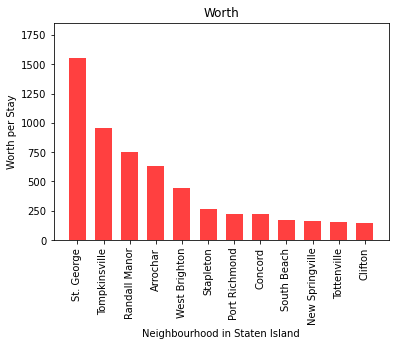

In [20]:
fig, ax = plt.subplots()

x_axis = np.arange(len(StatenIsland_neighbourhood_by_worth))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, worth_per_stay_by_neighbourhood_df['neighbourhood'], rotation=90)

y_axis = round(worth_per_stay_by_neighbourhood_df['Worth per Stay'], 2)


rects1 = ax.bar(x_axis, y_axis, color="red", alpha=0.75, align="center",  width=0.65)

ax.set_ylabel('Worth per Stay')
ax.set_title('Worth')
ax.set_xlabel('Neighbourhood in Staten Island')
ax.set_ylim(0,max(StatenIsland_neighbourhood_worth_per_stay)+300)


# def autolabel(rects):
#     # Attach a text label above each bar in *rects*, displaying its height.
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 2),  
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)

plt.show()

Picking top 5 neighbourhoods for profitability calculation:

1. St. George,
2. Tompkinsville,
3. Randall Manor,
4. Arrochar,
5. West Brighton,

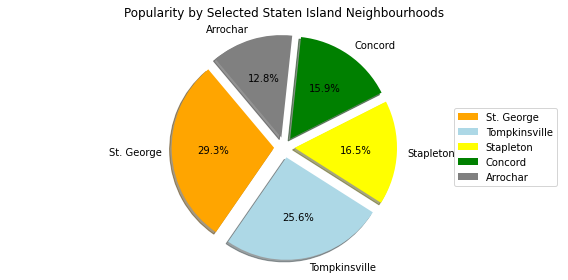

In [21]:
pie_chart_df = listing_count_by_neighbourhood_df.reset_index(drop=True)

pie_chart_df

pie_chart_df = pie_chart_df.loc[0:4, :]

fig, ax = plt.subplots(figsize=(8, 4), subplot_kw=dict(aspect="equal"))

neigh_list = pie_chart_df['neighbourhood']
length = len(pie_chart_df['neighbourhood'])

x_axis = np.arange(length)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, neigh_list, rotation=90)

y_axis = pie_chart_df['count']

explode = (0.1,0.1,0.1,0.1,0.1)
colors = ["orange","lightblue", "yellow", "green", "grey"]

ax.pie(y_axis, explode=explode, labels=neigh_list, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=130)

ax.set_title("Popularity by Selected Staten Island Neighbourhoods")
ax.legend(loc="center right")

plt.axis("equal")

fig.tight_layout()
plt.show()

In [22]:
profitability_df = worth_per_stay_by_neighbourhood_df.reset_index(drop=True)

profitability_df = profitability_df.iloc[0:5, :]

profitability_df.loc[:, 'Profitability'] = ''

profitability_df

profitability_df.iloc[0, 2] = profitability_df.iloc[0, 1] * (pie_chart_df.iloc[1, 1] / sum(pie_chart_df['count'])) 

profitability_df.iloc[1, 2] = profitability_df.iloc[1, 1] * (pie_chart_df.iloc[2, 1] / sum(pie_chart_df['count'])) 

profitability_df.iloc[2, 2] = profitability_df.iloc[2, 1] * (pie_chart_df.iloc[4, 1] / sum(pie_chart_df['count'])) 

profitability_df.iloc[3, 2] = profitability_df.iloc[3, 1] * (pie_chart_df.iloc[0, 1] / sum(pie_chart_df['count'])) 

profitability_df.iloc[4, 2] = profitability_df.iloc[4, 1] * (pie_chart_df.iloc[3, 1] / sum(pie_chart_df['count'])) 

profitability_df = profitability_df.loc[:, ['neighbourhood', 'Profitability']]

profitability_df = profitability_df.sort_values(by='Profitability', ascending=False)

profitability_df

,neighbourhood,Profitability
0,St. George,398.191
3,Arrochar,183.693
1,Tompkinsville,157.728
2,Randall Manor,96.2927
4,West Brighton,69.8618


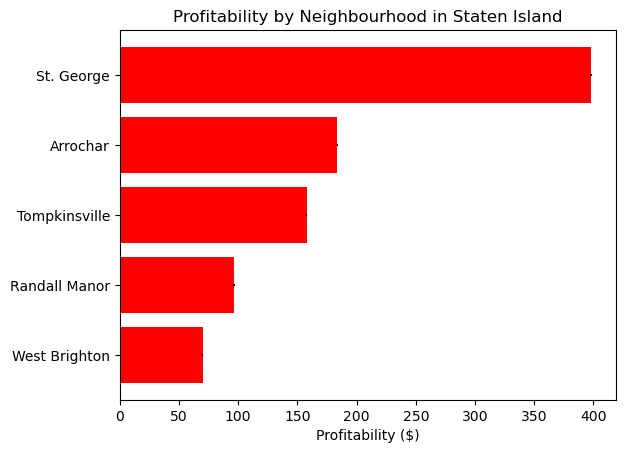

In [23]:
y_axis = profitability_df['neighbourhood'].values
x_axis = profitability_df['Profitability'].values


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data

y_pos = np.arange(len(y_axis))
error = np.random.rand(len(y_axis))

ax.barh(y_pos, x_axis, xerr=error, align='center', color = 'red')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_axis)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Profitability ($)')
ax.set_title('Profitability by Neighbourhood in Staten Island')

plt.show()

In [24]:
# bronx_crime_df = airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Bronx']

# manhattan_crime_df = airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Manhattan']

# queens_crime_df = airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Queens']

# brooklyn_crime_df = airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Brooklyn']

staten_island_crime_df = airbnbNY.loc[airbnbNY['neighbourhood_group'] == 'Staten Island']

In [25]:
# bronx_sample_crime_df = bronx_crime_df.sample(n=100, replace=True)
# manhattan_sample_crime_df = manhattan_crime_df.sample(n=100, replace=True)
# queens_sample_crime_df = queens_crime_df.sample(n=100, replace=True)
# brooklyn_sample_crime_df = brooklyn_crime_df.sample(n=100, replace=True)
staten_island_sample_crime_df = staten_island_crime_df.sample(n=100, replace=True)

# bronx_sample_crime_df = bronx_sample_crime_df.reset_index(drop=True)
# manhattan_sample_crime_df = manhattan_sample_crime_df.reset_index(drop=True)
# queens_sample_crime_df = queens_sample_crime_df.reset_index(drop=True)
# brooklyn_sample_crime_df = brooklyn_sample_crime_df.reset_index(drop=True)
staten_island_sample_crime_df = staten_island_sample_crime_df.reset_index(drop=True)

In [26]:
# crime_df_sample_list = [bronx_sample_crime_df, manhattan_sample_crime_df, 
#                         queens_sample_crime_df, brooklyn_sample_crime_df, staten_island_sample_crime_df]

crime_df_sample_list = [staten_island_sample_crime_df]

neighbourhoods = ['Staten Island']
crime_numbers = []

for sample in crime_df_sample_list:
    for index, row in sample.iterrows():
        neighbourhood = row["neighbourhood"]
        neighbourhood_group = row["neighbourhood_group"]
        print(f'Looking for crime rate in index no:{index} | {neighbourhood} | {neighbourhood_group}')
        lat = row["latitude"]
        lng = row["longitude"]
        url = 'https://data.cityofnewyork.us/resource/qb7u-rbmr.json?$where=within_circle'
        query_url = url + f"(lat_lon, {lat}, {lng}, 2000)"
    
        response = requests.get(query_url)
        data = response.json()
    
        try:
            sample.loc[index,'Number of Crimes'] = len(data)

        except:
            print(f"missing value for row number {index}")
    print(f"Total Number of Crimes in {neighbourhood_group}: {sum(sample['Number of Crimes'])}")
    crime_numbers.append(sum(sample['Number of Crimes']))
    
print(f"------------------------------------------------------------------------")
print(f"Data retrieval complete.")

Looking for crime rate in index no:0 | Huguenot | Staten Island
Looking for crime rate in index no:1 | Tompkinsville | Staten Island
Looking for crime rate in index no:2 | Grymes Hill | Staten Island
Looking for crime rate in index no:3 | Concord | Staten Island
Looking for crime rate in index no:4 | South Beach | Staten Island
Looking for crime rate in index no:5 | Castleton Corners | Staten Island
Looking for crime rate in index no:6 | Bull's Head | Staten Island
Looking for crime rate in index no:7 | St. George | Staten Island
Looking for crime rate in index no:8 | Tompkinsville | Staten Island
Looking for crime rate in index no:9 | Stapleton | Staten Island
Looking for crime rate in index no:10 | New Springville | Staten Island
Looking for crime rate in index no:11 | West Brighton | Staten Island
Looking for crime rate in index no:12 | Huguenot | Staten Island
Looking for crime rate in index no:13 | Tompkinsville | Staten Island
Looking for crime rate in index no:14 | Clifton | Sta

In [27]:
crime_df = pd.DataFrame({'Neighbourhood': neighbourhoods,
                         'Total Crime Number': crime_numbers
                        })

crime_df = crime_df.sort_values(by='Total Crime Number', ascending=False)
crime_df

,Neighbourhood,Total Crime Number
0,Staten Island,0.0


In [28]:
## additional finding price by neighbourhoods
## This will help with choosing best price range to offer for the specific neighbourhood group


#Brooklyn
Brooklyn = airbnbNY.loc[airbnbNY['neighbourhood_group'] == 'Brooklyn']
price_Brooklyn = Brooklyn[['price']]

#Bronx
Bronx = airbnbNY.loc[airbnbNY['neighbourhood_group'] == 'Bronx']
price_Bronx = Bronx[['price']]

#Manhattan
Manhattan = airbnbNY.loc[airbnbNY['neighbourhood_group'] == 'Manhattan']
price_Manhattan = Manhattan[['price']]

#Queens
Queens= airbnbNY.loc[airbnbNY['neighbourhood_group'] == 'Queens']
price_Queens = Queens[['price']]

#Staten Island
StatenIsland = airbnbNY.loc[airbnbNY['neighbourhood_group'] == 'Staten Island']
price_StatenIsland = StatenIsland[['price']]


#putting all the prices' dfs in the list
price_list = [price_Brooklyn,price_Bronx, price_Manhattan, price_Queens, price_StatenIsland]



In [29]:
#creating an empty list that we will append later with price distributions for each neighbourhood_group
price_distribution_neighbourhood = []

#creating list with known values in neighbourhood_group column
neighbourhood_list=['Brooklyn', 'Bronx', 'Manhattan', 'Queens', 'Staten Island']

#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    price_distribution_neighbourhood.append(i)
    
#changing names of the price column to the area name for easier reading of the table    
price_distribution_neighbourhood[0].rename(columns={'price':neighbourhood_list[0]}, inplace=True)
price_distribution_neighbourhood[1].rename(columns={'price':neighbourhood_list[1]}, inplace=True)
price_distribution_neighbourhood[2].rename(columns={'price':neighbourhood_list[2]}, inplace=True)
price_distribution_neighbourhood[3].rename(columns={'price':neighbourhood_list[3]}, inplace=True)
price_distribution_neighbourhood[4].rename(columns={'price':neighbourhood_list[4]}, inplace=True)

#finilizing our dataframe for final view    
neighbourhood_stat_df = price_distribution_neighbourhood
neighbourhood_stat_df = [df.set_index('Stats') for df in neighbourhood_stat_df]
neighbourhood_stat_df = neighbourhood_stat_df[0].join(neighbourhood_stat_df[1:])
neighbourhood_stat_df

,Brooklyn,Bronx,Manhattan,Queens,Staten Island
Stats,,,,,
min,0.0,0.0,0.0,10.0,13.0
25%,60.0,45.0,95.0,50.0,50.0
50%,90.0,65.0,150.0,75.0,75.0
75%,150.0,99.0,220.0,110.0,110.0
max,10000.0,2500.0,10000.0,10000.0,5000.0


Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

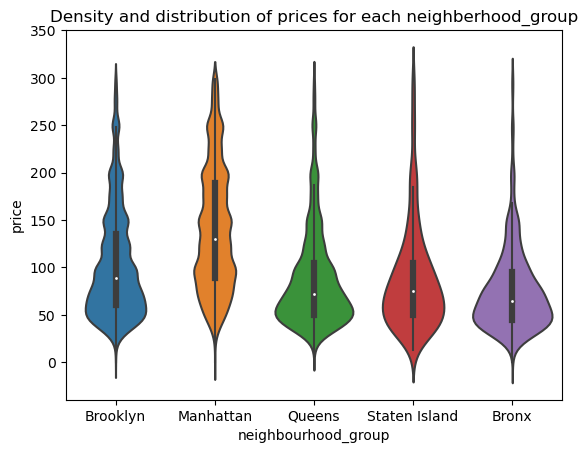

In [30]:
#removing extreme values for visualization
#creating a sub-dataframe with no extreme values / less than 300

neighbourhoodPrice = airbnbNY[airbnbNY.price < 300]

#using violinplot to showcase density and distribtuion of prices 

img1 = sns.violinplot(data = neighbourhoodPrice, x='neighbourhood_group', y='price')
img1.set_title('Density and distribution of prices for each neighberhood_group')

In [67]:
## additional finding price by neighbourhoods
## This will help with choosing best price range to offer from the top 5 neighbourhoods


#St. George
StGeorge = airbnbNY_StatenIsland_df.loc[airbnbNY_StatenIsland_df['neighbourhood'] == 'St. George']
price_StGeorge = StGeorge[['price']]

#Tompkinsville
Tompkinsville = airbnbNY_StatenIsland_df.loc[airbnbNY_StatenIsland_df['neighbourhood'] == 'Tompkinsville']
price_Tompkinsville = Tompkinsville[['price']]

#Randall Manor
RandallManor = airbnbNY_StatenIsland_df.loc[airbnbNY_StatenIsland_df['neighbourhood'] == 'Randall Manor']
price_RandallManor = RandallManor[['price']]

#Arrochar
Arrochar= airbnbNY_StatenIsland_df.loc[airbnbNY_StatenIsland_df['neighbourhood'] == 'Arrochar']
price_Arrochar = Arrochar[['price']]

#West Brighton
WestBrighton = airbnbNY_StatenIsland_df.loc[airbnbNY_StatenIsland_df['neighbourhood'] == 'West Brighton']
price_WestBrighton = WestBrighton[['price']]


#putting all the prices' dfs in the list
price_list1 = [price_StGeorge, price_Tompkinsville, price_RandallManor, price_Arrochar, price_WestBrighton]



In [70]:
#creating an empty list that we will append later with price distributions for top 5 neighbourhoods
price_distribution_neighbourhood1 = []

#creating list with known values in neighbourhood_group column
neighbourhood_list1=['St. George', 'Tompkinsville', 'Randall Manor', 'Arrochar', 'West Brighton']

#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list1:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    price_distribution_neighbourhood1.append(i)
    
#changing names of the price column to the area name for easier reading of the table    
price_distribution_neighbourhood1[0].rename(columns={'price':neighbourhood_list1[0]}, inplace=True)
price_distribution_neighbourhood1[1].rename(columns={'price':neighbourhood_list1[1]}, inplace=True)
price_distribution_neighbourhood1[2].rename(columns={'price':neighbourhood_list1[2]}, inplace=True)
price_distribution_neighbourhood1[3].rename(columns={'price':neighbourhood_list1[3]}, inplace=True)
price_distribution_neighbourhood1[4].rename(columns={'price':neighbourhood_list1[4]}, inplace=True)

#finilizing dataframe for final view    
neighbourhood_stat1_df = price_distribution_neighbourhood1
neighbourhood_stat1_df = [df.set_index('Stats') for df in neighbourhood_stat1_df]
neighbourhood_stat1_df = neighbourhood_stat1_df[0].join(neighbourhood_stat1_df[1:])
neighbourhood_stat1_df

,St. George,Tompkinsville,Randall Manor,Arrochar,West Brighton
Stats,,,,,
min,29.0,30.00,13.0,32.00,37.00
25%,68.5,47.25,61.0,34.00,50.50
50%,96.0,62.00,79.0,65.00,69.50
75%,120.0,93.75,104.0,117.75,82.25
max,195.0,199.00,149.0,199.00,125.00


Text(0.5, 1.0, 'Density and distribution of prices for selected neighberhoods in the Staten Island')

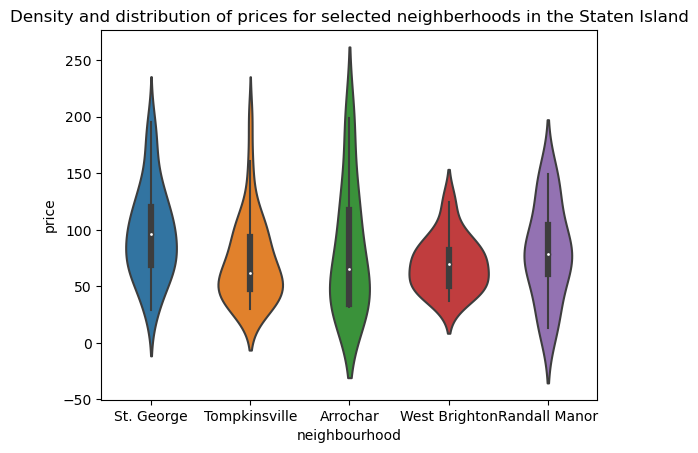

In [71]:
#removing extreme values for visualization
#creating a sub-dataframe with no extreme values / less than 400

#1 way
# a = airbnbNY_StatenIsland.loc[airbnbNY_StatenIsland['neighbourhood'] == 'St. George']
# b = airbnbNY_StatenIsland.loc[airbnbNY_StatenIsland['neighbourhood'] == 'Tompkinsville']
# c = airbnbNY_StatenIsland.loc[airbnbNY_StatenIsland['neighbourhood'] == 'Randall Manor']
# d = airbnbNY_StatenIsland.loc[airbnbNY_StatenIsland['neighbourhood'] == 'Arrochar']
# e = airbnbNY_StatenIsland.loc[airbnbNY_StatenIsland['neighbourhood'] == 'West Brighton']

# abcde = pd.concat([a,b,c,d,e])

# neighbourhoodPrice1 = abcde[abcde.price < 400]
# 1 way end

#preferred way
price_distri_df = airbnbNY_StatenIsland_df.loc[airbnbNY_StatenIsland_df['neighbourhood'].isin
                                            (['St. George','Tompkinsville','Randall Manor','Arrochar','West Brighton'])]

neighbourhoodPrice1 = price_distri_df[price_distri_df.price < 400]
#end preferred way

#using violinplot to showcase density and distribtuion of prices 

priceDistr_viz = sns.violinplot(data = neighbourhoodPrice1, x='neighbourhood', y='price')
priceDistr_viz.set_title('Density and distribution of prices for selected neighberhoods in the Staten Island')
#priceDistr_viz.set(ylim=(-70,350))

In [ ]:
#Above statistical table and a violin plot gives us the distribution of prices for Airbnb in NYC - Staten Island for top 5 neighbourhoods. 
#We can state that St. George has the highest price for the listings with $96 average price listings, followed by Randall Manor with $79 per night.


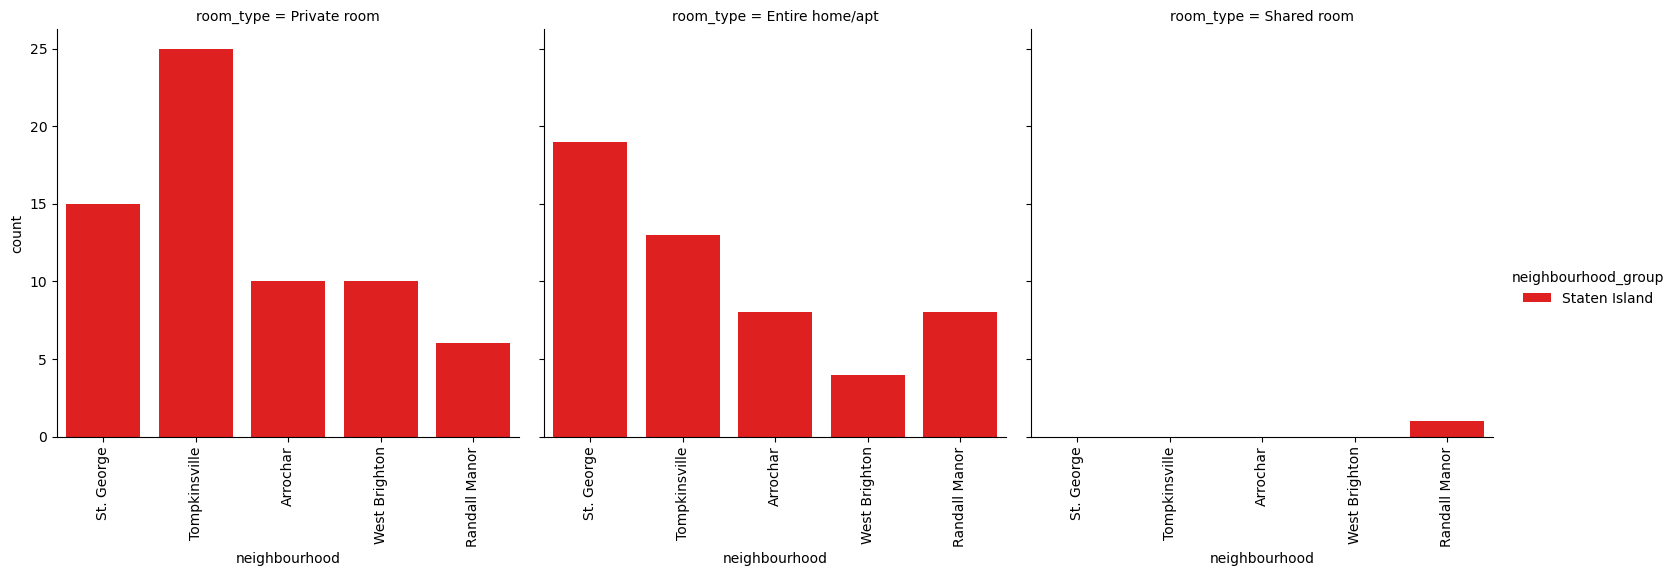

In [72]:
#top 5 neighbourhoods 
roomtype_df = airbnbNY_StatenIsland_df.loc[airbnbNY_StatenIsland_df['neighbourhood'].isin(['St. George','Tompkinsville','Randall Manor','Arrochar','West Brighton'])]
#using catplot to represent multiple interesting attributes together and a count
roomtype_viz = sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data = roomtype_df, kind='count', 
                  palette = sns.color_palette(['red']))
roomtype_viz.set_xticklabels(rotation=90)

In [ ]:
#Above catplot consists of 3 subplots for room types per top 5 neighbourhoods
#we can see better trend if choose top 10 across all 5 groups... diff. colors for diff. group

#The observation that is contrasted the most is that 'Shared room' type.
#Airbnb listing is barely available among top 5 neighborhoods. 
#Entire home/ apt is preferred to rent in St. George which is Staten Island`s top neighbourhood,
#whereas private room is preferred in Tompkinsville.

In [ ]:
#Using latitude and longitude points to visualize Staten Island listings for price < 400,
#,as we dropped high values as outlier for our analysis.
#Also, we added a color-coded range for each point on the map based on the price of the listing. 


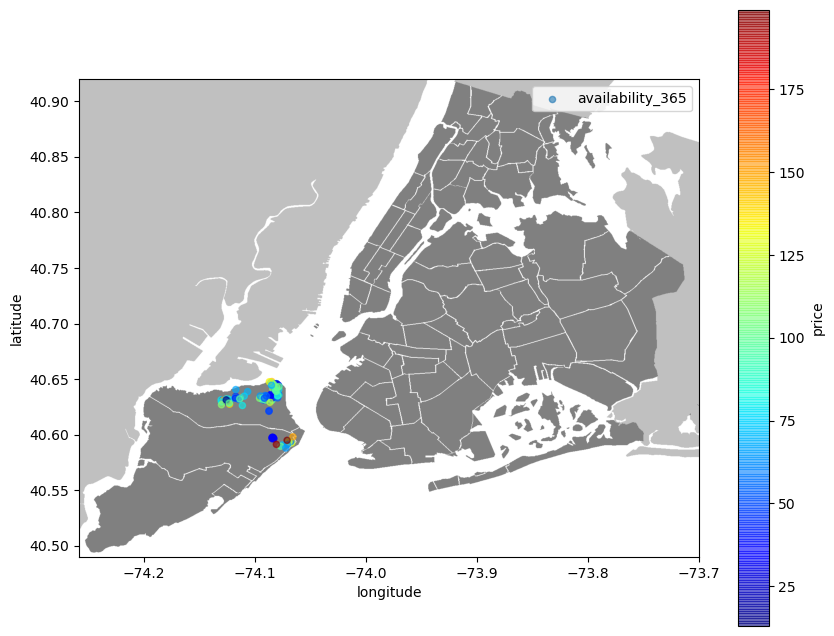

In [77]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img = plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax = plt.gca()
#using scatterplot again
neighbourhoodPrice1.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.6, zorder=5)

plt.legend()
plt.show()



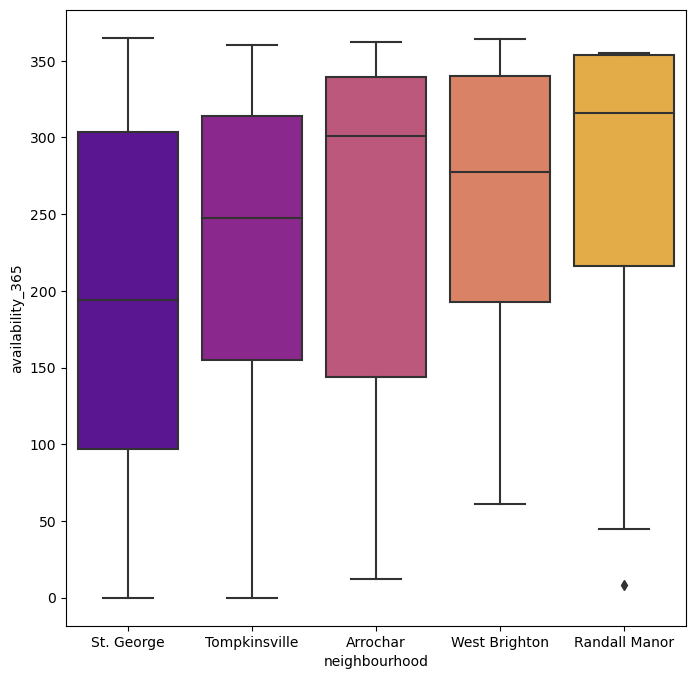

In [85]:
#Relation between neighbourgroup and Availability of Room
plt.figure(figsize=(8,8))
ax = sns.boxplot(data=roomtype_df, x='neighbourhood',y='availability_365',palette='plasma')